In [102]:
import pandas as pd
import os
import csv
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
from scipy import random
from lmfit.models import GaussianModel

In [103]:
mainpath = "C:/Users/marce/Python"
filename = "Analisis/Data.csv"
fullpath = os.path.join(mainpath,filename)

In [104]:
data = pd.read_csv(fullpath)
data.head()

,Tiempo,Extensión,Carga,Tiempo.1,Extensión.1,Carga.1,Tiempo.2,Extensión.2,Carga.2,Tiempo.3,Extensión.3,Carga.3,Tiempo.4,Extensión.4,Carga.4,Tiempo.5,Extensión.5,Carga.5
0,0.0,0.00000,-0.00288,0.1,0.00187,-0.00367,0.0,0.00000,-0.00477,0.0,0.00000,0.00062,0.0,0.00000,-0.00629,0.0,0.00000,-0.00128
1,0.1,0.00229,-0.00118,0.2,0.00896,0.00317,0.1,0.00271,-0.00450,0.1,0.00146,0.00133,0.1,0.00167,-0.00644,0.1,0.00250,-0.00141
2,0.2,0.00937,0.00647,0.3,0.01917,0.01499,0.2,0.00958,-0.00085,0.2,0.01062,0.00728,0.2,0.00833,-0.00210,0.2,0.01250,0.00668
3,0.3,0.01937,0.01917,0.4,0.02937,0.02670,0.3,0.01958,0.01137,0.3,0.02187,0.01859,0.3,0.01854,0.00853,0.3,0.02292,0.01729
4,0.4,0.02937,0.03354,0.5,0.03917,0.03905,0.4,0.02958,0.02150,0.4,0.03187,0.02704,0.4,0.02896,0.02098,0.4,0.03229,0.02927


In [105]:
data.describe()

,Tiempo,Extensión,Carga,Tiempo.1,Extensión.1,Carga.1,Tiempo.2,Extensión.2,Carga.2,Tiempo.3,Extensión.3,Carga.3,Tiempo.4,Extensión.4,Carga.4,Tiempo.5,Extensión.5,Carga.5
count,36165.000000,37908.000000,40625.000000,40625.000000,40625.000000,39724.000000,39724.000000,39724.000000,37908.000000,37908.000000,36623.000000,36860.000000,36860.000000,36860.000000,36623.000000,36623.000000,36165.000000,36165.000000
mean,1808.200000,314.050187,293.538098,1633.517948,296.189017,208.488185,1662.913589,301.748983,32.895440,1727.018115,194.312224,45.959559,1776.643636,193.366078,24.000424,1786.173048,150.683446,21.161447
std,1044.008058,749.071604,974.686064,1104.589566,726.637328,806.282123,1099.338498,733.882337,61.697093,1084.704439,397.218855,293.793625,1059.012478,396.114392,34.097270,1055.762520,87.000656,13.501177
min,0.000000,0.000000,-0.002880,0.100000,0.001870,-0.003670,0.000000,0.000000,-0.004770,0.000000,0.000000,0.000620,0.000000,0.000000,-0.006440,0.000000,0.000000,-0.001410
25%,904.100000,78.972645,9.720820,569.700000,62.000200,9.167022,637.175000,67.624155,8.921685,773.375000,76.296030,8.431640,851.975000,74.815038,8.287760,869.750000,75.341870,8.756880
50%,1808.200000,157.945820,21.314710,1585.300000,146.633320,19.926455,1630.250000,150.380715,19.381965,1721.050000,152.591860,17.959280,1773.450000,151.604350,19.205000,1785.300000,150.683320,19.652810
75%,2712.300000,236.918777,35.073800,2600.900000,231.266430,32.973515,2623.325000,233.136290,31.748970,2668.725000,228.887785,29.560480,2694.925000,228.393838,32.400995,2700.850000,226.025390,32.780810
max,3616.398000,3790.758000,4062.326000,3616.500000,3790.700000,3972.242000,3616.400000,3790.700000,315.891630,3616.400000,3662.184000,3685.892000,3616.400000,3662.200000,305.183720,3616.400000,301.366420,46.559040


In [106]:
data.dtypes

Tiempo         float64
Extensión      float64
Carga          float64
Tiempo.1       float64
Extensión.1    float64
Carga.1        float64
Tiempo.2       float64
Extensión.2    float64
Carga.2        float64
Tiempo.3       float64
Extensión.3    float64
Carga.3        float64
Tiempo.4       float64
Extensión.4    float64
Carga.4        float64
Tiempo.5       float64
Extensión.5    float64
Carga.5        float64
dtype: object

In [107]:
pd.isnull(data["Carga.1"]).values.ravel().sum()

901

In [108]:
pd.notnull(data["Extensión"]).values.ravel().sum()

37908

# Borrado de columnas de "Tiempo"

In [109]:
data1 =data
data1 =data1.drop(["Tiempo", "Tiempo.1", "Tiempo.2", "Tiempo.3","Tiempo.4","Tiempo.5"],axis=1)
data1.head()

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.5
0,0.00000,-0.00288,0.00187,-0.00367,0.00000,-0.00477,0.00000,0.00062,0.00000,-0.00629,0.00000,-0.00128
1,0.00229,-0.00118,0.00896,0.00317,0.00271,-0.00450,0.00146,0.00133,0.00167,-0.00644,0.00250,-0.00141
2,0.00937,0.00647,0.01917,0.01499,0.00958,-0.00085,0.01062,0.00728,0.00833,-0.00210,0.01250,0.00668
3,0.01937,0.01917,0.02937,0.02670,0.01958,0.01137,0.02187,0.01859,0.01854,0.00853,0.02292,0.01729
4,0.02937,0.03354,0.03917,0.03905,0.02958,0.02150,0.03187,0.02704,0.02896,0.02098,0.03229,0.02927


In [110]:
account_lenght = data1[["Extensión","Carga", "Extensión.1", "Carga.1", "Extensión.2", "Carga.2", "Extensión.3", "Carga.3", "Extensión.4", "Carga.4", "Extensión.5", "Carga.5"]]
account_lenght.head()
data2 = data1[data1["Extensión"]<3610]
data2.head()

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.5
0,0.00000,-0.00288,0.00187,-0.00367,0.00000,-0.00477,0.00000,0.00062,0.00000,-0.00629,0.00000,-0.00128
1,0.00229,-0.00118,0.00896,0.00317,0.00271,-0.00450,0.00146,0.00133,0.00167,-0.00644,0.00250,-0.00141
2,0.00937,0.00647,0.01917,0.01499,0.00958,-0.00085,0.01062,0.00728,0.00833,-0.00210,0.01250,0.00668
3,0.01937,0.01917,0.02937,0.02670,0.01958,0.01137,0.02187,0.01859,0.01854,0.00853,0.02292,0.01729
4,0.02937,0.03354,0.03917,0.03905,0.02958,0.02150,0.03187,0.02704,0.02896,0.02098,0.03229,0.02927


# Plot y visualización

In [111]:
Carga1= data2["Carga"]
Carga1.head()

0   -0.00288
1   -0.00118
2    0.00647
3    0.01917
4    0.03354
Name: Carga, dtype: float64

In [112]:
type(Carga1)

pandas.core.series.Series

In [113]:
subset = data2[["Extensión", "Carga", "Extensión.1", "Carga.1", "Extensión.2", "Carga.2", "Extensión.3", "Carga.3", "Extensión.4", "Carga.4", "Extensión.5", "Carga.1", "Extensión.5", "Carga.5"]]

In [114]:
subset1 = data2[["Extensión", "Carga", "Extensión.1", "Carga.1", "Extensión.2", "Carga.2", "Extensión.3", "Carga.3", "Extensión.4", "Carga.4", "Extensión.5", "Carga.1", "Extensión.5", "Carga.5"]][:50]
subset1.head()

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.1,Extensión.5,Carga.5
0,0.00000,-0.00288,0.00187,-0.00367,0.00000,-0.00477,0.00000,0.00062,0.00000,-0.00629,0.00000,-0.00367,0.00000,-0.00128
1,0.00229,-0.00118,0.00896,0.00317,0.00271,-0.00450,0.00146,0.00133,0.00167,-0.00644,0.00250,0.00317,0.00250,-0.00141
2,0.00937,0.00647,0.01917,0.01499,0.00958,-0.00085,0.01062,0.00728,0.00833,-0.00210,0.01250,0.01499,0.01250,0.00668
3,0.01937,0.01917,0.02937,0.02670,0.01958,0.01137,0.02187,0.01859,0.01854,0.00853,0.02292,0.02670,0.02292,0.01729
4,0.02937,0.03354,0.03917,0.03905,0.02958,0.02150,0.03187,0.02704,0.02896,0.02098,0.03229,0.03905,0.03229,0.02927


In [115]:
data2.iloc[:10 , 3:6]
data2.head()

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.5
0,0.00000,-0.00288,0.00187,-0.00367,0.00000,-0.00477,0.00000,0.00062,0.00000,-0.00629,0.00000,-0.00128
1,0.00229,-0.00118,0.00896,0.00317,0.00271,-0.00450,0.00146,0.00133,0.00167,-0.00644,0.00250,-0.00141
2,0.00937,0.00647,0.01917,0.01499,0.00958,-0.00085,0.01062,0.00728,0.00833,-0.00210,0.01250,0.00668
3,0.01937,0.01917,0.02937,0.02670,0.01958,0.01137,0.02187,0.01859,0.01854,0.00853,0.02292,0.01729
4,0.02937,0.03354,0.03917,0.03905,0.02958,0.02150,0.03187,0.02704,0.02896,0.02098,0.03229,0.02927


In [116]:
data2.shape

(36165, 12)

In [117]:
data3 = data2
data3 = data2[data2["Extensión"]<3616]
data3.tail()

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.5
36160,301.33389,42.56761,301.34183,42.46901,301.33496,42.67854,301.33371,41.36115,301.33371,45.64490,301.33328,46.55358
36161,301.34183,42.56017,301.34976,42.47063,301.34308,42.67968,301.34204,41.36227,301.34204,45.64412,301.34204,46.55541
36162,301.34976,42.55069,301.35806,42.47103,301.35123,42.68026,301.35059,41.36363,301.34998,45.64540,301.35037,46.55795
36163,301.35828,42.54178,301.36682,42.47355,301.35974,42.68284,301.35892,41.36505,301.35828,45.64692,301.35849,46.55843
36164,301.37143,24.07120,301.37558,42.47486,301.36807,42.68416,301.36682,41.36612,301.36682,45.64821,301.36642,46.55904


In [118]:
data3["Esfuerzo.1 (GPa)"] = (data2["Carga"]*9.8)/30
data3["Def.1 (mm/mm)"] = data2["Extensión"]/56.7
data3["Esfuerzo.2 (GPa)"] = (data2["Carga.1"]*9.8)/30
data3["Def.2 (mm/mm)"] = data2["Extensión.1"]/60.6
data3["Esfuerzo.3 (GPa)"] = (data2["Carga.2"]*9.8)/30
data3["Def.3 (mm/mm)"] = data2["Extensión.2"]/58.3
data3["Esfuerzo.4 (GPa)"] = (data2["Carga.3"]*9.8)/30
data3["Def.4 (mm/mm)"] = data2["Extensión.3"]/55.8
data3["Esfuerzo.5 (GPa)"] = (data2["Carga.4"]*9.8)/30
data3["Def.5 (mm/mm)"] = data2["Extensión.4"]/53.2
data3["Esfuerzo.6 (GPa)"] = (data2["Carga.5"]*9.8)/30
data3["Def.6 (mm/mm)"] = data2["Extensión.5"]/53.1

In [119]:
data3["Esfuerzo.1 (GPa)"].head()
data3["Def.1 (mm/mm)"].head() 
data3["Esfuerzo.2 (GPa)"].head()
data3["Def.2 (mm/mm)"].head()
data3["Esfuerzo.3 (GPa)"].head()
data3["Def.3 (mm/mm)"].head()
data3["Esfuerzo.4 (GPa)"].head()
data3["Def.4 (mm/mm)"].head()
data3["Esfuerzo.5 (GPa)"].head()
data3["Def.5 (mm/mm)"].head()
data3["Esfuerzo.6 (GPa)"].head()
data3["Def.6 (mm/mm)"].head()

0    0.000000
1    0.000047
2    0.000235
3    0.000432
4    0.000608
Name: Def.6 (mm/mm), dtype: float64

# Eliminar Cargas y Extensiones

In [120]:
data4 =data3.drop(subset1,axis=1)
data4.head()

,Esfuerzo.1 (GPa),Def.1 (mm/mm),Esfuerzo.2 (GPa),Def.2 (mm/mm),Esfuerzo.3 (GPa),Def.3 (mm/mm),Esfuerzo.4 (GPa),Def.4 (mm/mm),Esfuerzo.5 (GPa),Def.5 (mm/mm),Esfuerzo.6 (GPa),Def.6 (mm/mm)
0,-0.000941,0.000000,-0.001199,0.000031,-0.001558,0.000000,0.000203,0.000000,-0.002055,0.000000,-0.000418,0.000000
1,-0.000385,0.000040,0.001036,0.000148,-0.001470,0.000046,0.000434,0.000026,-0.002104,0.000031,-0.000461,0.000047
2,0.002114,0.000165,0.004897,0.000316,-0.000278,0.000164,0.002378,0.000190,-0.000686,0.000157,0.002182,0.000235
3,0.006262,0.000342,0.008722,0.000485,0.003714,0.000336,0.006073,0.000392,0.002786,0.000348,0.005648,0.000432
4,0.010956,0.000518,0.012756,0.000646,0.007023,0.000507,0.008833,0.000571,0.006853,0.000544,0.009562,0.000608


# Gráficas

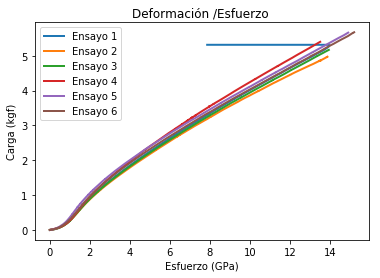

In [121]:
data5 = data4
dataframe1 = data5["Esfuerzo.1 (GPa)"]
dataframe2 = data5["Def.1 (mm/mm)"]
dataframe3 = data5["Esfuerzo.2 (GPa)"]
dataframe4 = data5["Def.2 (mm/mm)"]
dataframe5 = data5["Esfuerzo.3 (GPa)"]
dataframe6 = data5["Def.3 (mm/mm)"]
dataframe7 = data5["Esfuerzo.4 (GPa)"]
dataframe8 = data5["Def.4 (mm/mm)"]
dataframe9 = data5["Esfuerzo.5 (GPa)"]
dataframe10 = data5["Def.5 (mm/mm)"]
dataframe11 = data5["Esfuerzo.6 (GPa)"]
dataframe12= data5["Def.6 (mm/mm)"]

plt.plot(dataframe1, dataframe2, linewidth=2, label="Ensayo 1")
plt.plot(dataframe3, dataframe4, linewidth=2, label="Ensayo 2")
plt.plot(dataframe5, dataframe6, linewidth=2, label="Ensayo 3")
plt.plot(dataframe7, dataframe8, linewidth=2, label="Ensayo 4")
plt.plot(dataframe9, dataframe10, linewidth=2, label="Ensayo 5")
plt.plot(dataframe11, dataframe12, linewidth=2, label="Ensayo 6")

plt.xlabel("Esfuerzo (GPa)")
plt.ylabel("Carga (kgf)")
plt.legend()
plt.title("Deformación /Esfuerzo ")
plt.show()

In [122]:
data5["Esfuerzo Total"] = (data5["Esfuerzo.1 (GPa)"] + data5["Esfuerzo.2 (GPa)"] + data5["Esfuerzo.3 (GPa)"] +data5["Esfuerzo.4 (GPa)"] + data5["Esfuerzo.6 (GPa)"])/6
data5["Def. Total"] = (data5["Def.1 (mm/mm)"] + data5["Def.2 (mm/mm)"] + data5["Def.3 (mm/mm)"] +data5["Def.4 (mm/mm)"] + data5["Def.5 (mm/mm)"]+ data5["Def.6 (mm/mm)"])/6  


In [123]:
data5["Esfuerzo Total"].head()

0   -0.000652
1   -0.000141
2    0.001882
3    0.005070
4    0.008188
Name: Esfuerzo Total, dtype: float64

In [124]:
data5 = data5 =data5.iloc[:,[12,13]]

In [125]:
data6 = data5

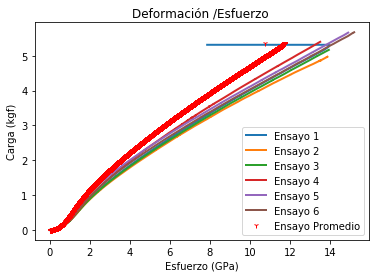

In [126]:
data5 = data4
dataframe1 = data5["Esfuerzo.1 (GPa)"]
dataframe2 = data5["Def.1 (mm/mm)"]
dataframe3 = data5["Esfuerzo.2 (GPa)"]
dataframe4 = data5["Def.2 (mm/mm)"]
dataframe5 = data5["Esfuerzo.3 (GPa)"]
dataframe6 = data5["Def.3 (mm/mm)"]
dataframe7 = data5["Esfuerzo.4 (GPa)"]
dataframe8 = data5["Def.4 (mm/mm)"]
dataframe9 = data5["Esfuerzo.5 (GPa)"]
dataframe10 = data5["Def.5 (mm/mm)"]
dataframe11 = data5["Esfuerzo.6 (GPa)"]
dataframe12= data5["Def.6 (mm/mm)"]

plt.plot(dataframe1, dataframe2, linewidth=2, label="Ensayo 1")
plt.plot(dataframe3, dataframe4, linewidth=2, label="Ensayo 2")
plt.plot(dataframe5, dataframe6, linewidth=2, label="Ensayo 3")
plt.plot(dataframe7, dataframe8, linewidth=2, label="Ensayo 4")
plt.plot(dataframe9, dataframe10, linewidth=2, label="Ensayo 5")
plt.plot(dataframe11, dataframe12, linewidth=2, label="Ensayo 6")

Esfuerzo_promedio  = data5["Esfuerzo Total"]
Deformacion_promedio  = data5["Def. Total"]
plt.plot(Esfuerzo_promedio, Deformacion_promedio, "r1", linewidth=0.5, label="Ensayo Promedio")
plt.xlabel("Esfuerzo (GPa)")
plt.ylabel("Carga (kgf)")
plt.legend()
plt.title("Deformación /Esfuerzo ")
plt.show()

In [127]:
data6.head()

,Esfuerzo Total,Def. Total
0,-0.000652,0.000005
1,-0.000141,0.000057
2,0.001882,0.000205
3,0.005070,0.000389
4,0.008188,0.000566


In [133]:
data6.to_csv("C:/Users/marce/Python/Analisis/Datanew.csv", index=False)
new_output = pd.read_csv("C:/Users/marce/Python/Analisis/Datanew.csv", keep_default_na=False, na_values=[""])
with open("C:/Users/marce/Python/Analisis/Datanew.csv", "r") as infile1:
    with open ("C:/Users/marce/Python/Analisis/Datanew1.csv", "w") as outfile1:
        for line in infile1:
            fields = line.strip().split(",")
            outfile1.write("\t".join(fields))
            outfile1.write("\n")

In [135]:
data10 = pd.read_csv("C:/Users/marce/Python/Analisis/Datanew1.csv", sep ="\t")
data10.head()

,Esfuerzo Total,Def. Total
0,-0.000652,0.000005
1,-0.000141,0.000057
2,0.001882,0.000205
3,0.005070,0.000389
4,0.008188,0.000566


In [ ]:
def model(x, u):
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])
def fun(x, u, y):
    return model(x, u) - y
def jac(x, u, y):
    J = np.empty((u.size, x.size))
    den = u ** 2 + x[2] * u + x[3]
    num = u ** 2 + x[1] * u
    J[:, 0] = num / den
    J[:, 1] = x[0] * u / den
    J[:, 2] = -x[0] * num * u / den ** 2
    J[:, 3] = -x[0] * num / den ** 2
    return J
u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1,
              8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2,
              4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
x0 = np.array([2.5, 3.9, 4.15, 3.9])
res = least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)


res.x
u_test = np.linspace(0, 5)
y_test = model(res.x, u_test)
plt.plot(u, y, 'o', markersize=4, label='data')
plt.plot(u_test, y_test, label='fitted model')
plt.xlabel("u")
plt.ylabel("y")
plt.legend(loc='lower right')
plt.show()



In [ ]:
import numpy as np
from scipy.optimize import root
from numpy import cosh, zeros_like, mgrid, zeros

# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)

P_left, P_right = 0, 0
P_top, P_bottom = 1, 0

def residual(P):
   d2x = zeros_like(P)
   d2y = zeros_like(P)

   d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
   d2x[0]    = (P[1]    - 2*P[0]    + P_left)/hx/hx
   d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

   d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
   d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
   d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy

   return d2x + d2y + 5*cosh(P).mean()**2

# solve
guess = zeros((nx, ny), float)
sol = root(residual, guess, method='broyden2', options={'disp': True})
#sol = root(residual, guess, method='broyden2', options={'disp': True, 'max_rank': 50})
#sol = root(residual, guess, method='anderson', options={'disp': True, 'M': 10})
print('Residual: %g' % abs(residual(sol.x)).max())

# visualize
import matplotlib.pyplot as plt
x, y = mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
plt.pcolor(x, y, sol.x)
plt.colorbar()
plt.show()